In [18]:
#Importing Necessary libraries

#Basic
import pandas as pd


#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


#Nlp
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re


In [22]:
file = "../../data/toxic/train.csv"
data = pd.read_csv(file)
data.sample(8)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
40872,6d17abebb77d5861,"""\n\nEncMstr covered it from a highlevel, I'll...",0,0,0,0,0,0
125001,9cb1f44c3bebb5cc,All those stupid little blocks will not stop m...,1,0,0,0,0,0
78998,d367e9305dd7ffaf,"Yes, please delete it not because of marginal ...",0,0,0,0,0,0
77961,d0ba7fb2eba56308,Delete? \n\nPlease do not delete this article ...,0,0,0,0,0,0
89109,ee605f61eceee18c,"""\nYou need to talk to the drafting arb more s...",0,0,0,0,0,0
36274,60ed4ba6ad3eda8f,You are a faggit \nGet a life and lick my ball...,1,0,1,0,1,0
63682,aa65f42e14996e8e,"""\n\nThe point is that it's not a single, unif...",0,0,0,0,0,0
148125,47552d049e093784,"""\n\nI apologize for coming to you for assista...",0,0,0,0,0,0


In [11]:
total_data = len(data)
print(total_data)

159571


### Checking the types of data we are using

In [12]:
data.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [13]:
### Classifying each class

In [14]:
toxic = data[data.toxic == 1]
severe_toxic = data[data.severe_toxic == 1]
obscene = data[data.obscene == 1]
threat = data[data.threat == 1]
insult = data[data.insult == 1]
identity_hate = data[data.identity_hate == 1]
non_toxic = data[(data.toxic == 0) & (data.severe_toxic == 0) & (data.obscene == 0) & (data.threat == 0) & (data.insult == 0) & (data.identity_hate == 0)]

def printDFrame(name, frame, total_data):
    print(name + ": " + str(frame.shape[0]) + " " + str(frame.shape[0]/total_data * 100) + "%")

p = printDFrame

p("Toxic", toxic, total_data)
p("Severe toxic", severe_toxic, total_data)
p("Obscene", obscene, total_data)
p("Threat", threat, total_data)
p("Insult", insult, total_data)
p("Identity hate", identity_hate, total_data)
p("Non toxic", non_toxic, total_data)

Toxic: 15294 9.584448302009765%
Severe toxic: 1595 0.9995550569965721%
Obscene: 8449 5.2948217407925%
Threat: 478 0.2995531769557125%
Insult: 7877 4.936360616904074%
Identity hate: 1405 0.8804858025581089%
Non toxic: 143346 89.83211235124176%


### Visualization of Class

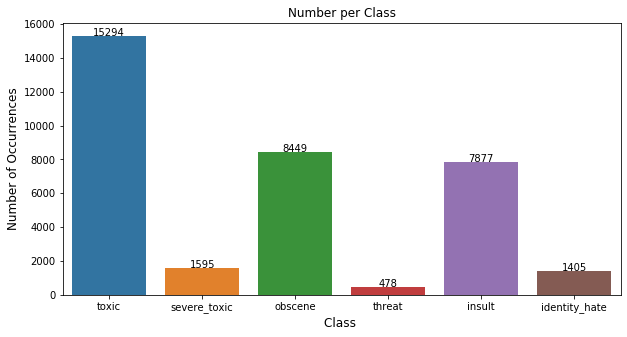

In [15]:
#Selecting data want to plot
x=data.iloc[:,2:].sum()
#plot
plt.figure(figsize=(10,5))
ax= sns.barplot(x.index, x.values)
#adding the text labels
plt.title("Number per Class")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class ', fontsize=12)
rects = ax.patches
labels = x.values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height , label, ha='center')
plt.show()

### Visualization Mutiple tags per comment

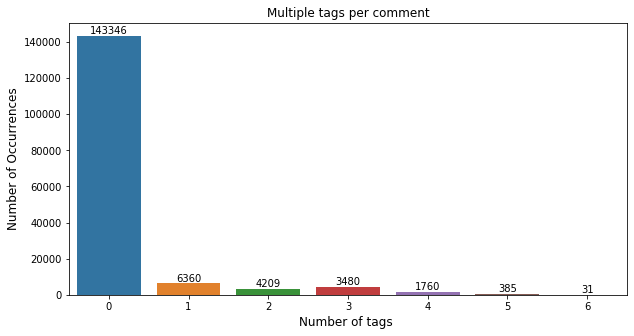

In [16]:
rowsums=data.iloc[:,2:].sum(axis=1)

x=rowsums.value_counts()

#plot
plt.figure(figsize=(10,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple tags per comment")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [34]:
file = "../../data/toxic/export_dataframe.csv"
data = pd.read_csv(file)
data.sample(8)

,id_str,text,created_at,polarity,user_location
6417,1248284699417444352,"RT @LAHomeless: ""By early next week, well have...",2020-04-09 16:20:39,0,Los Angeles
6975,1248284746314022913,"RT @haveigotnews: MPs offered an extra 10,000 ...",2020-04-09 16:20:50,0,Belgium
7036,1248284752546803719,RT @OHdeptofhealth: Social distancing works. W...,2020-04-09 16:20:51,0,"Washington, D.C."
4875,1248284569536794625,RT @MyFaveBench: That's a brilliant Bench. Che...,2020-04-09 16:20:08,1,NW waiting to defect to Kernow
1975,1247543277185904640,RT @dereckapurnell: The coronavirus pandemic d...,2020-04-07 15:14:30,0,"iPhone: 41.663357,-73.929550"
1523,1247543239223246848,RT @OmarJimenez: In the middle of the coronavi...,2020-04-07 15:14:21,0,NaN
6356,1248284694505906177,RT @seanmdav: The IHME models assumed full soc...,2020-04-09 16:20:37,0,"Realville, USA"
2889,1247554377436598273,RT @MollyJongFast: Will @kayleighmcenany tell ...,2020-04-07 15:58:36,0,"Palmyra, PA"


In [47]:
additional  = ['rt','rts','retweet'] #we'll store additional stopwords here
swords = set().union(stopwords.words('english'),additional) #big list containing all the stopwords + our additional ones

In [48]:
df['processed_text'] = df['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])

In [52]:
words = df['processed_text'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [64]:
words.sample(5)

,word,occurences
4580,normal,12.0
4328,mistaken,2.0
1715,coverage,2.0
6401,sung,3.0
6438,surrounding,1.0


In [70]:
locs = df['user_location'].value_counts()
locs.drop('',inplace=True)
locs = locs[locs>=20]

In [71]:
locs

United States              194
USA                         60
Washington, DC              55
California, USA             49
London, England             48
New York, NY                48
Florida, USA                47
India                       46
London                      41
Texas, USA                  37
Los Angeles, CA             35
United Kingdom              32
Pennsylvania, USA           32
Chicago, IL                 27
New York, USA               26
UK                          24
Lagos, Nigeria              21
Canada                      21
England, United Kingdom     20
Earth                       20
Michigan, USA               20
Name: user_location, dtype: int64